In [ ]:
# Transfer learning



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras.layers import Dense,Flatten

import os
import tensorflow_hub as hub
import PIL.Image as Image
import cv2
from imutils import paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
mobilenet_v2="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(mobilenet_v2, input_shape=IMAGE_SHAPE+(3,))
])


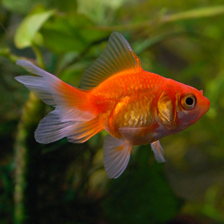

In [ ]:
gold_fish = Image.open("/content/drive/MyDrive/DNN/goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish=np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [ ]:
gf=gold_fish[np.newaxis, ...]
gf.shape

(1, 224, 224, 3)

In [ ]:
result=classifier.predict(gf)
np.argmax(result)

1/1 [==============================] - 3s 3s/step


2

In [ ]:
file='/content/drive/MyDrive/DNN/ImageNetLabels.txt'
with open(file) as t :
  image_net_labels=t.read().splitlines()

In [ ]:
print(image_net_labels[np.argmax(result)])

goldfish


In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]


[PosixPath('datasets/flower_photos/roses/4558025386_2c47314528.jpg'),
 PosixPath('datasets/flower_photos/roses/15537825851_a80b6321d7_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4918137796_21f0922b0c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5073473370_bdbb5a99fc.jpg'),
 PosixPath('datasets/flower_photos/roses/4495885281_fe2a3b671d.jpg')]

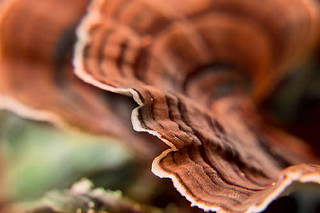

In [ ]:
Image.open(str(roses[1]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

NameError: ignored

In [ ]:
predicted = classifier.predict(np.array([X[0],X[1],X[3]]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([550, 795, 722])

In [ ]:
y[550]

0

In [ ]:
image_net_labels[550]

'envelope'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
PATH= data_dir

def read_dataset(PATH, RESIZE):
  data = list()
  labels = list()
  for image_path in paths.list_images(PATH):
    data.append(cv2.resize(cv2.imread(image_path), RESIZE))
    labels.append(image_path.replace('\\','/').split('/')[-2])
  return np.array(data), np.array(labels)

In [ ]:
data,labels=read_dataset(PATH,(224, 224))

In [ ]:
np.unique(labels)

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

In [ ]:
len(data),len(labels)

(3670, 3670)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encode=le.fit_transform(labels)
print(labels_encode)

[3 3 3 ... 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels_encode, random_state=0)

In [ ]:
np.unique(labels)

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2752, 224, 224, 3), (2752,), (918, 224, 224, 3), (918,))

In [ ]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [ ]:
pretrained=hub.KerasLayer(feature_extractor_model,input_shape=(224, 224, 3),trainable=False)

model=Sequential([
    pretrained,
    Dense(len(np.unique(labels)))
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=1)